In [1]:
import pandas as pd

stellar_data = pd.read_csv('star_classification.csv')
stellar_data.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [2]:
# total count of records
stellar_data.shape


(100000, 18)

In [3]:
# no of records where the class is 'Star', 'Galaxy', 'Quasar'
stellar_data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [4]:
# basic data cleaning and preprocessing for stellar_data
stellar_data = stellar_data.dropna()
stellar_data = stellar_data.drop_duplicates()

stellar_data_mod = stellar_data.copy()

#drop columns 8,9,10,11
stellar_data_mod.drop(stellar_data_mod.columns[[8,9,10,11]], axis=1, inplace=True)
stellar_data_mod.head()



,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
#print the column names

stellar_data_mod.columns


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'spec_obj_ID',
       'class', 'redshift', 'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [6]:
#Create three new binary columns: "is_Star," "is_Galaxy," and "is_Quasar.
#For each row in the dataset, set the corresponding column value to 1 and the others to 0 based on the original "class" value. 
#For example, if the "class" value is "Star," set "is_Star" to 1 and "is_Galaxy" and "is_Quasar" to 0.

stellar_data_mod['is_Star'] = stellar_data_mod['class'].apply(lambda x: 1 if x == 'STAR' else 0)
stellar_data_mod['is_Galaxy'] = stellar_data_mod['class'].apply(lambda x: 1 if x == 'GALAXY' else 0)
stellar_data_mod['is_Quasar'] = stellar_data_mod['class'].apply(lambda x: 1 if x == 'QSO' else 0)

stellar_data_mod.head()




,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,is_Star,is_Galaxy,is_Quasar
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,5812,56354,171,0,1,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,10445,58158,427,0,1,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,4576,55592,299,0,1,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,9149,58039,775,0,1,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,6121,56187,842,0,1,0


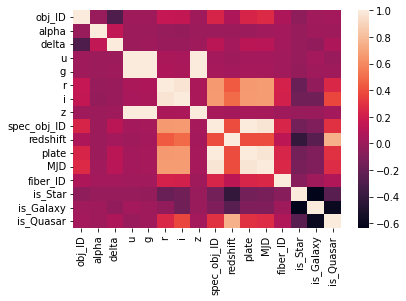

In [7]:
#build a correlation matrix to see which features are correlated with the target variables

import seaborn as sns
import matplotlib.pyplot as plt

corr = stellar_data_mod.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



In [45]:
# Separate the dataset based on the three categories: Create three separate subsets of your dataset, each containing data points belonging to one of the three categories in your categorical variable.Compute summary statistics (such as mean, standard deviation, etc.) for the numerical variables within each category subset. This will give you an overview of the distribution of numerical values across the categories.

# create three separate subsets of the dataset, each containing data points belonging to one of the three categories in the categorical variable "class"

star_data = stellar_data_mod[stellar_data_mod['is_Star'] == 1]
galaxy_data = stellar_data_mod[stellar_data_mod['is_Galaxy'] == 1]
quasar_data = stellar_data_mod[stellar_data_mod['is_Quasar'] == 1]

# compute summary statistics for the numerical variables within each category subset

star_data.describe() 



,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star,is_Galaxy,is_Quasar
count,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.0,21594.0,21594.0
mean,1.237664e+18,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,4.827882e+18,-0.000115,4287.920348,55131.149115,410.120033,1.0,0.0,0.0
std,8.300272e+12,99.876175,20.383288,68.228825,68.210460,1.972786,1.841714,68.193708,3.030706e+18,0.000465,2691.789973,1656.266867,255.385284,0.0,0.0,0.0
min,1.237646e+18,0.029838,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,3.006288e+17,-0.004136,267.000000,51608.000000,1.000000,1.0,0.0,0.0
25%,1.237658e+18,114.863064,3.127855,19.327275,18.034847,17.454012,17.139703,16.963810,2.609860e+18,-0.000295,2318.000000,53905.000000,201.000000,1.0,0.0,0.0
50%,1.237663e+18,174.151671,23.400565,21.010555,19.542825,18.955080,18.592360,18.319225,3.711076e+18,-0.000076,3296.000000,54924.000000,394.000000,1.0,0.0,0.0
75%,1.237669e+18,240.850550,39.939705,22.960617,21.228690,20.557478,20.041690,19.729615,7.190131e+18,0.000075,6386.000000,56365.000000,582.000000,1.0,0.0,0.0
max,1.237681e+18,359.999810,83.000519,30.660390,30.607000,29.374110,30.250090,26.427790,1.412693e+19,0.004153,12547.000000,58932.000000,1000.000000,1.0,0.0,0.0


In [11]:
galaxy_data.describe()


,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star,is_Galaxy,is_Quasar
count,5.944500e+04,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,5.944500e+04,59445.000000,59445.000000,59445.000000,59445.000000,59445.0,59445.0,59445.0
mean,1.237665e+18,177.954727,23.513911,22.587379,20.906101,19.587552,18.851990,18.449156,5.482554e+18,0.421596,4869.375608,55423.463605,450.645858,0.0,1.0,0.0
std,8.399536e+12,94.403760,19.315205,2.264355,2.107755,1.874133,1.689809,1.656302,3.218214e+18,0.264858,2858.332435,1806.053472,272.901259,0.0,0.0,0.0
min,1.237646e+18,0.005528,-12.364701,13.897990,12.679020,11.746640,11.299560,10.897380,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000,0.0,1.0,0.0
25%,1.237659e+18,131.506951,5.167016,20.794760,18.912680,17.817150,17.379670,17.095670,2.445527e+18,0.164527,2172.000000,53845.000000,221.000000,0.0,1.0,0.0
50%,1.237664e+18,181.315787,22.301731,22.841770,21.582200,20.104590,19.223660,18.766630,5.370729e+18,0.456274,4770.000000,55830.000000,433.000000,0.0,1.0,0.0
75%,1.237668e+18,231.333266,37.972697,24.207410,22.445130,20.974610,19.947090,19.472260,7.647197e+18,0.594699,6792.000000,56543.000000,649.000000,0.0,1.0,0.0
max,1.237681e+18,359.994125,77.615588,29.325650,31.602240,29.571860,30.163590,29.383740,1.412693e+19,1.995524,12547.000000,58932.000000,1000.000000,0.0,1.0,0.0


In [12]:
quasar_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star,is_Galaxy,is_Quasar
count,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000,18961.0,18961.0,18961.0
mean,1.237665e+18,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,7.817338e+18,1.719676,6943.071621,56627.547176,489.768419,0.0,0.0,1.0
std,8.659960e+12,98.962348,19.588410,1.495879,1.163239,1.084237,1.080135,1.095076,3.143628e+18,0.913954,2792.093167,1579.823334,283.673805,0.0,0.0,0.0
min,1.237646e+18,0.010959,-15.980904,10.996230,13.662170,12.357630,12.637440,11.302470,3.006293e+17,0.000461,267.000000,51608.000000,1.000000,0.0,0.0,1.0
25%,1.237659e+18,129.133119,7.427090,20.637640,20.249730,20.006330,19.811070,19.644250,5.635235e+18,1.106605,5005.000000,55868.000000,250.000000,0.0,0.0,1.0
50%,1.237662e+18,183.682504,29.299167,21.503240,21.056290,20.772720,20.582110,20.373970,8.527725e+18,1.617232,7574.000000,56955.000000,486.000000,0.0,0.0,1.0
75%,1.237671e+18,235.864774,42.886953,22.286470,21.687770,21.413450,21.202280,21.001230,9.847373e+18,2.220279,8746.000000,57870.000000,730.000000,0.0,0.0,1.0
max,1.237681e+18,359.999615,82.288657,32.781390,27.894820,27.397090,32.141470,28.790550,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000,0.0,0.0,1.0


In [74]:
star_data.head()

,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,2.751763e+18,-0.000008,2444,54082,232,1
12,1.237681e+18,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,7.323011e+18,0.000072,6504,56540,574,1
16,1.237679e+18,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,4.822278e+18,-0.000429,4283,55864,178,1
18,1.237679e+18,14.383135,3.214326,21.82154,20.55730,19.94918,19.76057,19.55514,9.855073e+18,-0.000440,8753,57373,258,1
21,1.237658e+18,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,8.237292e+18,-0.000120,7316,56710,756,1


In [71]:
star_data.head()

#drop 'class' column from all three subsets

star_data.drop(['class'], axis=1, inplace=True)
galaxy_data.drop(['class'], axis=1, inplace=True)
quasar_data.drop(['class'], axis=1, inplace=True)



/Users/omkar/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
#normalize the numerical variables in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

star_data[['alpha','delta','u','g','r','i','z','redshift','plate','MJD','fiber_ID']] = scaler.fit_transform(star_data[['alpha','delta','u','g','r','i','z','redshift','plate','MJD','fiber_ID']])
star_data.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/omkar/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star
9,1.237671e+18,-1.352554,0.225891,0.015491,0.012927,0.115860,0.149046,0.011494,2.751763e+18,0.230041,-0.685032,-0.633457,-0.697472,1
12,1.237681e+18,1.717841,0.450100,0.036392,0.014540,0.239520,0.367386,0.015005,7.323011e+18,0.401419,0.823293,0.850638,0.641712,1
16,1.237679e+18,1.791931,-1.001714,0.056562,0.033566,1.016951,1.221642,0.038333,4.822278e+18,-0.674370,-0.001828,0.442482,-0.908922,1
18,1.237679e+18,-1.600532,-0.995163,0.016588,0.020585,0.508030,0.660723,0.024706,9.855073e+18,-0.699524,1.658816,1.353588,-0.595663,1
21,1.237658e+18,-0.294864,1.144491,0.056548,0.046663,1.001460,0.721103,0.019048,8.237292e+18,-0.011742,1.124958,0.953281,1.354377,1


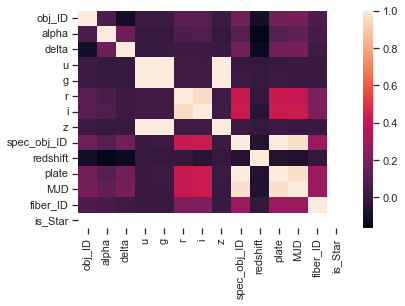

In [81]:
#visualize a correlation matrix for star_data

corr = star_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


In [82]:
#check for outliers and duplicates in star_data
star_data = star_data.drop_duplicates()

star_data.describe()



,obj_ID,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,fiber_ID,is_Star
count,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,2.159400e+04,21594.0
mean,1.237664e+18,4.738268e-17,-7.633876e-17,-1.118758e-17,-4.606649e-18,1.052948e-16,-5.264742e-16,6.580927e-19,4.827882e+18,-2.369134e-17,-2.500752e-17,1.903204e-15,5.264742e-17,1.0
std,8.300272e+12,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,3.030706e+18,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.0
min,1.237646e+18,-1.744247e+00,-2.074487e+00,-1.468576e+02,-1.468746e+02,-4.625493e+00,-4.926955e+00,-1.468919e+02,3.006288e+17,-8.645035e+00,-1.493807e+00,-2.127212e+00,-1.602009e+00,1.0
25%,1.237658e+18,-5.944641e-01,-9.994055e-01,-1.997047e-02,-1.639583e-02,-7.567931e-01,-7.623689e-01,-1.329465e-02,2.609860e+18,-3.879663e-01,-7.318424e-01,-7.403261e-01,-8.188603e-01,1.0
50%,1.237663e+18,-8.291795e-04,-4.807452e-03,4.701196e-03,5.712403e-03,4.111528e-03,2.640226e-02,6.581765e-03,3.711076e+18,8.330040e-02,-3.685070e-01,-1.250728e-01,-6.312191e-02,1.0
75%,1.237669e+18,6.670020e-01,8.066182e-01,3.328307e-02,3.042861e-02,8.163812e-01,8.133666e-01,2.726436e-02,7.190131e+18,4.092279e-01,7.794547e-01,7.449762e-01,6.730378e-01,1.0
max,1.237681e+18,1.859999e+00,2.919222e+00,1.461379e-01,1.679226e-01,5.285611e+00,6.356374e+00,1.254894e-01,1.412693e+19,9.175990e+00,3.068319e+00,2.294883e+00,2.309818e+00,1.0


In [91]:
# returns F-statistic and P-value
from scipy.stats import f_oneway

#running ANOVA test between the numerical variables and the target variable "is_Star"

f_oneway(star_data['alpha'], star_data['delta'], star_data['u'], star_data['g'], star_data['r'], star_data['i'], star_data['z'], star_data['redshift'], star_data['plate'], star_data['MJD'], star_data['fiber_ID'], star_data['is_Star'])




F_onewayResult(statistic=1962.999999999998, pvalue=0.0)